In Chapter 1 of his book **Hands-On Data Preprocessing in Python**, Roy Jafari provides valuable recommendations for understanding a new dataset. While it's not feasible to cover every detail and attribute in this notebook, especially the most important one, which is just asking about the dataset to someone with knowledge of it, some noteworthy points can be transformed into insights for future analyses.

The steps mentioned can be summarized as follows:
1. Ask questions.
2. Check the structure of the dataframe.
3. Check the values.
4. Visualize the attributes.

## Step 1 | Asking questions
First step recommended by Jafari is to simply ask about and research the dataframe. In our case, we will be using a dataset obtained from [datos.gob.ar](www.datos.gob.ar), the open data platform created by Argentina's Public Administration.

In particular, our dataset is located in https://www.datos.gob.ar/dataset/renaper-estructura-poblacion-origen-extranjero and contains data about the foreign population living in Argentina. On https://www.datos.gob.ar/dataset/renaper-estructura-poblacion-origen-extranjero/archivo/renaper_4.2 we can see more information about the data types, unit of measures and column names and descriptions (in spanish).

The following table contains the data found on the site about this specific dataframe.

| **Column Title** | **Data Type** | **Description** | **Unit of Measure** |
|------------------|---------------|-----------------|-------------------------|
| pais_origen      | Text (string) | Country of birth |                       |
| provincia_id     | Integer       | Code assigned by the National Institute of Statistics and Census for each Province, including CABA (Buenos Aires Autonomous City) |                       |
| provincia_nombre | Text (string) | Name of the province of residence as per the DNI (National Identity Document) |                       |
| amba             | Text (string) | Classification of residence based on whether it's in the Buenos Aires Metropolitan Area or elsewhere in the country |                       |
| sexo             | Text (string) | Gender as per the DNI |                       |
| edad_quinquenal  | Text (string) | Quinquennial age groups |                       |
| cantidad         | Integer       | Number of people identified with foreign origin DNIs | People |

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Load dataframe from file
foreign_population_df = pd.read_csv("poblacion_extranjera_identificada_agosto_2023.csv", encoding="utf-8")

## Step 2 | Check the data structure

### Dataframe shape

Knowing about the shape, or number of rows and columns in a dataframe can be accomplished by using the `df.shape` property. In our case we use indexing to first access the number of rows and columns separatedly.

### Column information

This was also partially covered when we read documentation. However with the property `df.columns` we can see the column names as they are on the `DataFrame` object.
The method `df.info()` can also display the data types and the number of entries on the index.

**NOTE:** To facilitate the understanding of this project to any non spanish speaker the columns will be renamed to english.

In [2]:
# Show number of rows and columns
print(f"NUMBER OF ROWS: {foreign_population_df.shape[0]}")
print(f"NUMBER OF COLUMNS: {foreign_population_df.shape[1]}")

# Show original column names
print(f"\nORIGINAL COLUMN NAMES:\n- {', '.join(foreign_population_df.columns)}")

# Rename columns and display new column names
foreign_population_df = foreign_population_df.rename(mapper={
    "pais_origen": "country_of_birth",
    "provincia_id": "province_id",
    "nombre_provincia": "province_name", # On the website it says this column name is "provincia_nombre" but on the file it's different
    "amba": "amba",
    "sexo": "gender",
    "edad_quinquenal": "age_group",
    "Cantidad": "quantity"
}, axis=1)

print(f"COLUMN NAMES AFTER RENAMING:\n- {', '.join(foreign_population_df.columns)}\n")

# Display range of the index and column data types
foreign_population_df.info(memory_usage=False, show_counts=False)

NUMBER OF ROWS: 15403
NUMBER OF COLUMNS: 7

ORIGINAL COLUMN NAMES:
- pais_origen, provincia_id, nombre_provincia, sexo, edad_quinquenal, amba, Cantidad
COLUMN NAMES AFTER RENAMING:
- country_of_birth, province_id, province_name, gender, age_group, amba, quantity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   country_of_birth  object
 1   province_id       int64 
 2   province_name     object
 3   gender            object
 4   age_group         object
 5   amba              object
 6   quantity          int64 
dtypes: int64(2), object(5)

### Visual inspection

We can also do a visual inspection of the first values present on the dataframe by using the method `df.head()`. Alternatively, `df.tail()` does the same for the last rows. By default, only 5 rows are shown, unless specified otherwise.

In [3]:
foreign_population_df.head()

,country_of_birth,province_id,province_name,gender,age_group,amba,quantity
0,Alemania,6,Buenos Aires,F,0 a 4,AMBA,12
1,Alemania,6,Buenos Aires,F,10 a 14,AMBA,37
2,Alemania,6,Buenos Aires,F,15 a 19,AMBA,48
3,Alemania,6,Buenos Aires,F,20 a 24,AMBA,45
4,Alemania,6,Buenos Aires,F,25 a 29,AMBA,44


## Step 3 | Checking values

### Check unique values
When we are dealing with categorical data we will want to see which categories are present on the dataframe, for that we can use the method `df.column.unique()`.

In [4]:
# Display unique values for every column of the data type object
for column in foreign_population_df.select_dtypes(include='object').columns:
    print(f"{column.upper()}:\n{foreign_population_df[column].unique()}\n")

COUNTRY_OF_BIRTH:
['Alemania' 'Bolivia' 'Brasil' 'Chile' 'China' 'Colombia' 'Corea del Sur'
 'Cuba' 'Ecuador' 'España' 'Estados Unidos' 'Francia' 'Italia' 'México'
 'Otro país' 'Paraguay' 'Perú' 'Rep. Dominicana' 'Ucrania' 'Uruguay'
 'Venezuela']

PROVINCE_NAME:
['Buenos Aires' 'Catamarca' 'Chaco' 'Chubut'
 'Ciudad Autónoma de Buenos Aires' 'Córdoba' 'Corrientes' 'Entre Ríos'
 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja' 'Mendoza' 'Misiones' 'Neuquén'
 'Río Negro' 'Salta' 'San Juan' 'San Luis' 'Santa Cruz' 'Santa Fe'
 'Santiago del Estero' 'Tierra Del Fuego' 'Tucumán']

GENDER:
['F' 'M' 'X']

AGE_GROUP:
['0 a 4' '10 a 14' '15 a 19' '20 a 24' '25 a 29' '30 a 34' '35 a 39'
 '40 a 44' '45 a 49' '5 a 9' '50 a 54' '55 a 59' '60 a 64' '65 a 69'
 '70 a 74' '75 a 79' '80 a 84' '85 y más']

AMBA:
['AMBA' 'Resto del pais']



### Checking for missing values
Pandas dataframes come with the builtin method `df.isnull()` for finding missing values.

**Note:** `df.isnull()` doesn't count empty strings as missing values. We can change that behaviour by using `pandas.options.mode.use_inf_as_na = True` or by replacing empty strings with a valid null value like `nan` from the numpy library.

In [5]:
# We replace any empty strings on the dataframe with np.nan and then check for any missing data
foreign_population_df.replace("", np.nan).isnull().sum()

country_of_birth    0
province_id         0
province_name       0
gender              0
age_group           0
amba                0
quantity            0
dtype: int64

### The .describe() function

Statistical summarization is one of the best ways to get to know more about numerical data. Luckily, pandas already has the `df.describe()` function which is perfect for that when we don't know much about the dataset. For any numerical column it will include count, mean, standard deviation, min and max values as well as first, second and third quartiles.

In [6]:
# We will only use describe on column quantity given that province_id is a categorical variable despite being a number
foreign_population_df["quantity"].describe()

count    15403.000000
mean       200.894112
std       1274.816181
min          1.000000
25%          3.000000
50%         10.000000
75%         45.000000
max      42066.000000
Name: quantity, dtype: float64

## Step 4 | Visualizing attributes

For most datasets, studying all of the summarization values can be overwhelm us. Visualization tools can help remedy that situation. Pandas already comes with a collection of plot functions which makes it quite easy to rapidly build basic but very informative visualizations. These functions become even more powerful when combined with the matplotlib library.

### Histograms and boxplots

Data exploration with Pandas' is easy by using `.box()` and `.hist()` functions. `.box()` provides a concise summary of a dataset's distribution, highlighting central tendencies and outliers. Meanwhile, `.hist()` delivers a visual representation of data frequency, aiding in the identification of patterns and trends.

**NOTE:** In this dataframe, each row would represent a subset of people in a given country of origin, age range and gender, residing in a specific province or Buenos Aires City.


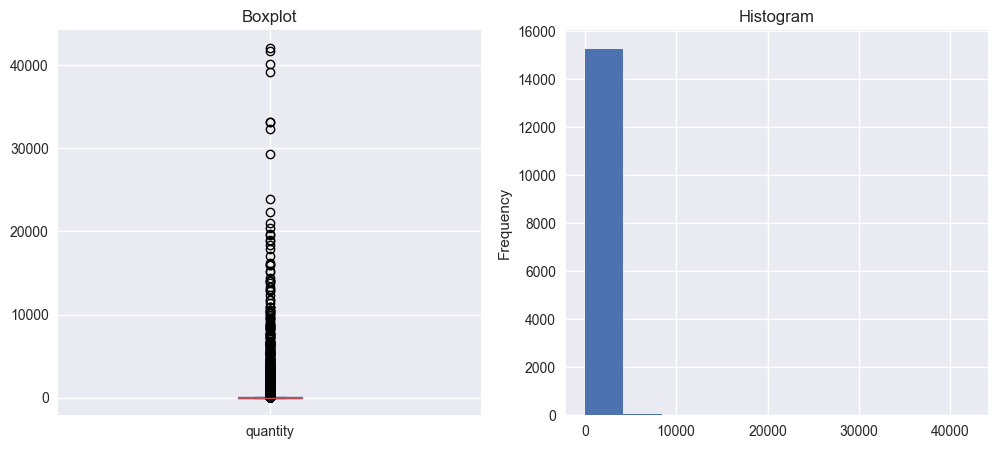

In [7]:
# Change the style used by matplotlib
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-v0_8')

# Create the figure and axes to display the visualizations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
foreign_population_df["quantity"].plot.box(ax=axes[0])
axes[0].set_title('Boxplot')

# Histogram
foreign_population_df["quantity"].plot.hist(ax=axes[1])
axes[1].set_title('Histogram')

plt.show()


### Customizing Visualizations

Analyzing the 'quantity' column in `foreign_population_df` reveals a skewed distribution towards smaller values, complicating visualization. Additionally, outliers, as seen on the boxplot, further challenge data interpretation. Combining the power of Matplotlib and Pandas allows for tailored visualizations to address these challenges.

To manage skewness, one approach we can use a logarithmic scale in the histogram, this compresses the x-axis, enhancing visibility of smaller values. With `.plot.hist()` it's as simple as passing the passing the `log=True` parameter.

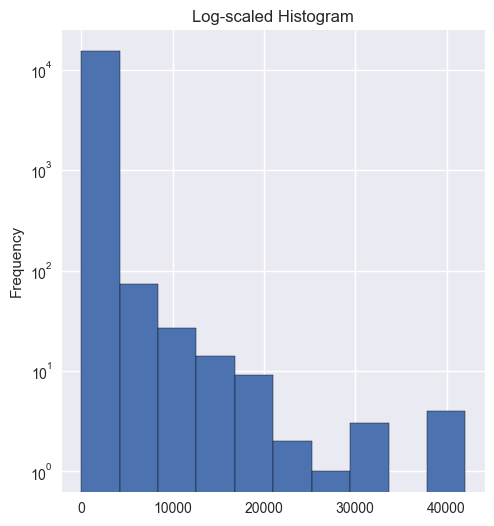

In [8]:
# Log-scaled histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
foreign_population_df['quantity'].plot.hist(log=True, edgecolor='black')
plt.title('Log-scaled Histogram')

plt.show()

As another example of the value of combining matplotlib and pandas functionalities, the following code combines both to create subsets of small multiples, a concept introduced by Edward Tufte. The figure and axes are set up to showcase three histograms, each focusing on a different range of values in the 'quantity' column. This approach allows for a more comprehensive view of the distribution, emphasizing specific value ranges for a more nuanced analysis.

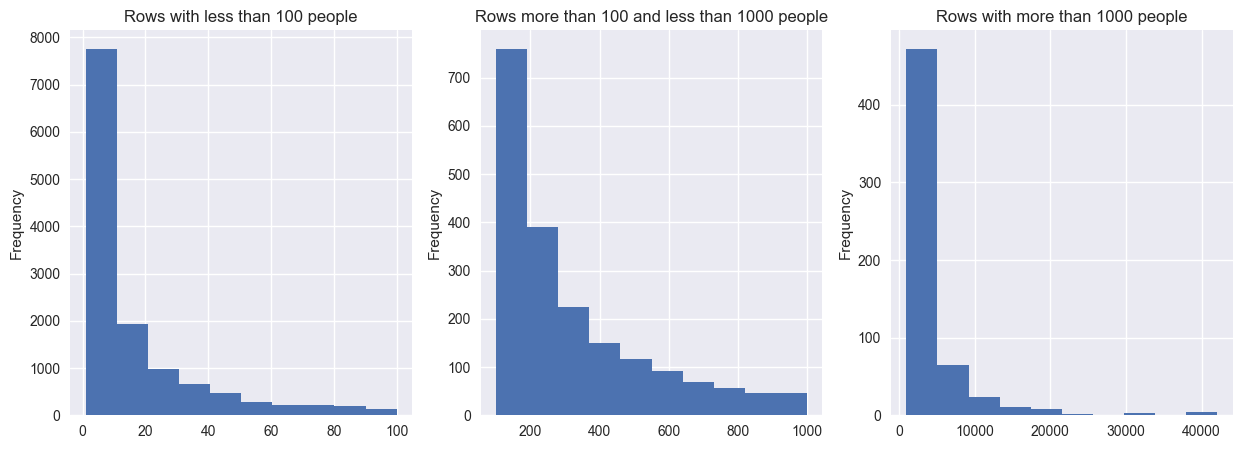

In [9]:
# Create the figure and axes to display the visualizations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create histograms applying small multiples concept
foreign_population_df[foreign_population_df["quantity"].between(0, 100)]["quantity"].plot.hist(ax=axes[0])
axes[0].set_title("Rows with less than 100 people")

foreign_population_df[foreign_population_df["quantity"].between(101, 1000)]["quantity"].plot.hist(ax=axes[1])
axes[1].set_title("Rows more than 100 and less than 1000 people")

foreign_population_df[foreign_population_df["quantity"].between(1001, foreign_population_df["quantity"].max())]["quantity"].plot.hist(ax=axes[2])
axes[2].set_title("Rows with more than 1000 people")

plt.show()

### Visualizing Categorical Values

Visualizing categorical attributes requires distinct strategies compared to numerical data, and the combination of Matplotlib and Pandas also provides tools for this task. Unlike numerical data, which often involves histograms or scatter plots, categorical data is better represented through other form of visualizations, like bar charts, pie charts, among others.

**1. Bar Charts:**
Bar charts are effective for displaying the distribution of categorical variables. Using Matplotlib's `bar` function with Pandas, you can easily illustrate the frequency or count of each category. This helps identify the most prevalent categories and their relative proportions.

**2. Pie Charts:**
Pie charts are suitable for displaying the proportion of each category in relation to the whole. With Matplotlib and Pandas, you can create pie charts to emphasize the percentage distribution of categorical attributes. This visualization method is particularly useful when showcasing the contribution of each category to the overall dataset.

In summary, leveraging the capabilities of Matplotlib and Pandas enables the creation of insightful visualizations for categorical attributes. Bar charts, pie charts, and count plots offer clear representations of the distribution and composition of categorical data, enhancing the understanding of patterns and relationships within a dataset. For example, for this dataframe, the numerical column quantity could be grouped by the categorical columns to get a better understanding of how foreign people are distributed in Argentina.

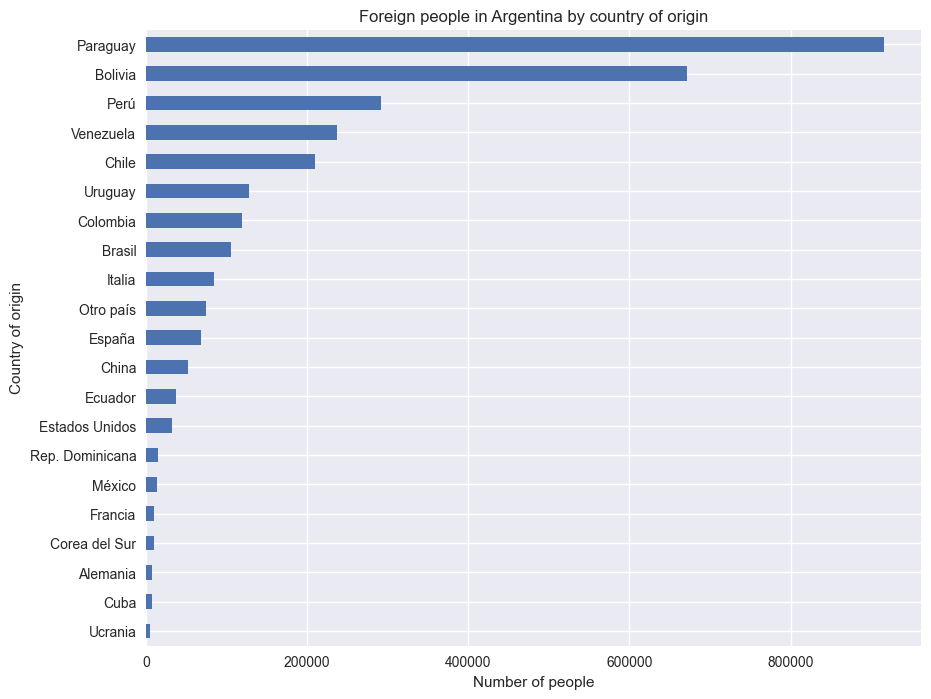

In [10]:
# First, we convert 'province_id' to str, so it doesn't interfere with calculations after groupby
foreign_population_df = foreign_population_df.astype({'province_id': str})

# Group dataframe by country of birth
df = foreign_population_df.groupby('country_of_birth').sum(numeric_only=True)
# Sort values in ascending order
df = df.sort_values(by='quantity', ascending=True)

# Plot bar chart
df.plot(kind='barh', figsize=(10, 8), legend=False)

plt.title('Foreign people in Argentina by country of origin')
plt.ylabel('Country of origin')
plt.xlabel('Number of people')
plt.show()

### Foreign population in Argentina by Gender

This code groups the foreign population in Argentina by gender, excluding records with 'X'. It then creates a pie chart, depicting the gender distribution with distinct colors. Labels are modified to 'F' for Female and 'M' for Male. Additionally, the total count of individuals with 'X' as their gender is annotated at the bottom. This way, we get a visual representation of the gender composition of the foreign population in Argentina.

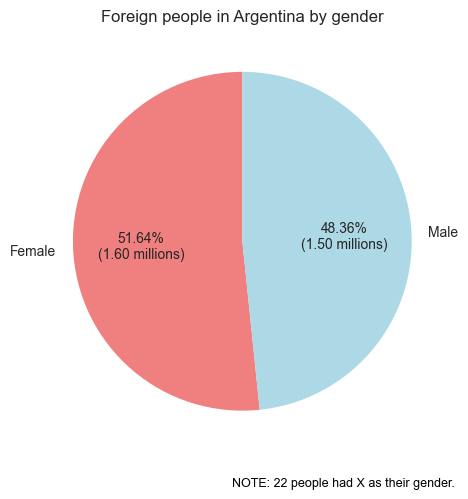

In [11]:
total_foreign_population = foreign_population_df["quantity"].sum().sum()

def formatter(x):
    return '{:.2f}%\n({:.2f} millions)'.format(x, total_foreign_population*x/100000000)

# Group dataframe by gender
grouped_data = foreign_population_df.query('gender != "X"').groupby('gender').sum(numeric_only=True)

# Plot a pie chart
grouped_data['quantity'].plot(
    kind='pie', 
    subplots=True,
    autopct=formatter,
    startangle=90,
    colors=['lightcoral', 'lightblue'], # Set colors for values in chart
    labels={'Female':'F', 'Male':'M'} # Change label values
    )

plt.title('Foreign people in Argentina by gender')
plt.ylabel('')

# Annotate the number of people with 'X' as their gender
total_x_people = foreign_population_df.query('gender == "X"')['quantity'].sum()
plt.gcf().text(0.5, 0.05, s=f"NOTE: {total_x_people} people had X as their gender.", fontsize=9, color='black')

plt.show()


### Where does the foreign population live in Argentina

This code creates a side-by-side visualization using subplots. The left plot illustrates the distribution of foreign people across provinces in a horizontal bar chart, with quantities formatted in millions. The right plot showcases the proportion of foreigners in the Buenos Aires Metropolitan Area (AMBA) using a pie chart. The plots provide insights into where foreingners live in Argentina.

**NOTE**: To make the Y axis more easily readable on the first plot, we change 'Ciudad Autónoma de Buenos Aires' to its abbreviation 'CABA'.

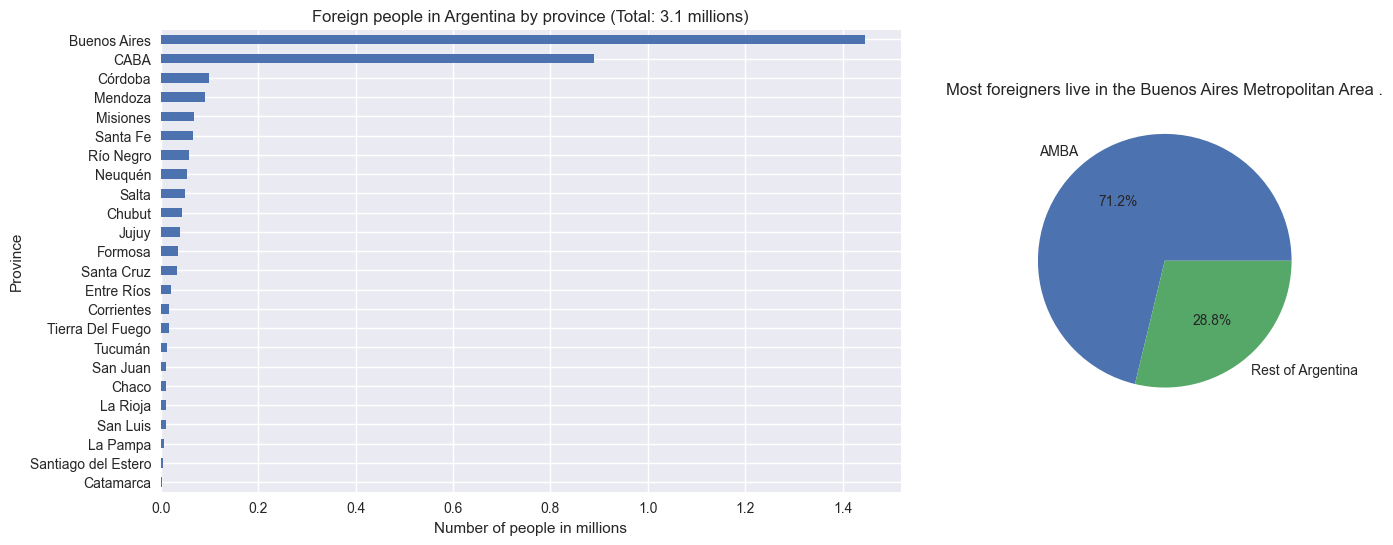

In [12]:
def formatter(x, pos):
    return str(round(x / 1000000, 1))

fig, axes = plt.subplots(1, 2, figsize=(15, 6), width_ratios=[0.7, 0.3] )

# Group dataframe by province
df = foreign_population_df.replace('Ciudad Autónoma de Buenos Aires', 'CABA').groupby('province_name').sum(numeric_only=True)
# Sort values in ascending order
df = df.sort_values(by='quantity', ascending=True)

# Create first visualization
df.plot(kind='barh', legend=False, ax=axes[0])
axes[0].xaxis.set_major_formatter(formatter) # Format number of people label in millions


axes[0].set_title(f'Foreign people in Argentina by province (Total: {formatter(total_foreign_population, None)} millions)')
axes[0].set_xlabel('Number of people in millions')
axes[0].set_ylabel('Province')

# Group dataframe by AMBA
amba_data = foreign_population_df.groupby('amba').sum(numeric_only=True)
# Create second visualization
amba_data.plot(
    kind='pie', 
    subplots=True,
    autopct='%1.1f%%',
    ax=axes[1], 
    labels=['AMBA', 'Rest of Argentina'],
    legend=None
    )
axes[1].set_title('Most foreigners live in the Buenos Aires Metropolitan Area .')
axes[1].set_ylabel('')

plt.show()


### Enhancing visualizations: Argentina's foreign population by age and gender.

The combination of pandas and matplotlib is a powerful framework for creating more sophisticated visualizations with detailed annotations, allowing for more insightful comparisons in data exploration. In the provided code snippet, this synergy is demonstrated in creating a heatmap of the foreign population in Argentina by gender and age group.

*Note: While the code exemplifies the capabilities of pandas and matplotlib, it's worth mentioning that seaborn, a higher-level visualization library built on top of matplotlib, offers a simpler heatmap function. Depending on the specific requirements, seaborn may be a convenient alternative for quick and straightforward heatmap generation.*

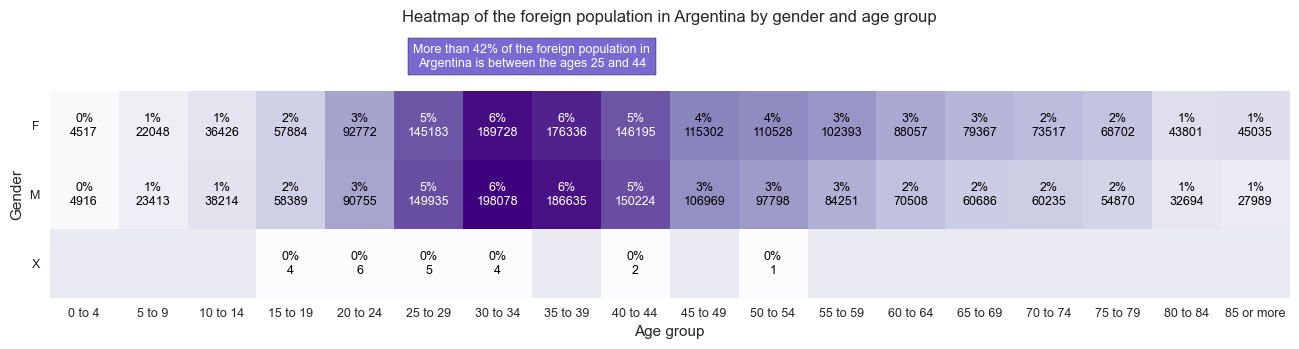

In [13]:
# Adjust the values in column age_group to english
foreign_population_df['age_group'] = foreign_population_df['age_group'].str.replace('a', 'to').str.replace('y más', 'or more')

# Assuming foreign_population_df is your DataFrame
result_df = foreign_population_df.groupby(['gender', 'age_group'])['quantity'].sum().unstack()

# Sort age groups by the first number on the column name
sorted_cols = sorted(result_df.columns, key=lambda x: int(x.split()[0]))
result_df = result_df[sorted_cols]
total_by_gender = result_df.sum(axis=1)

# Create a heatmap
plt.figure(figsize=(16, 12))
plt.imshow(result_df, cmap='Purples')
plt.xlabel('Age group')
plt.ylabel('Gender')
plt.title('Heatmap of the foreign population in Argentina by gender and age group', pad=50)
plt.xticks(range(len(result_df.columns)), result_df.columns, fontsize=9)
plt.yticks(range(len(result_df.index)), result_df.index, fontsize=9)
plt.grid()

# Annotate the heatmap with percentages and values
for i in range(len(result_df.index)):
    for j in range(len(result_df.columns)):
        count = result_df.iloc[i, j]
        total = total_foreign_population
        percentage = (count / total) * 100 if total != 0 else 0
        text = f'{percentage:.0f}%\n{count:.0f}' if not np.isnan(count) else ''

        plt.text(j, i, text, ha='center', va='center', fontsize=9, color='white' if percentage > 4 else 'black')

# Calculate the middle position between '25 to 29' and '40 to 44'
text_x_position = (np.argmax(result_df.columns == '25 to 29') + np.argmax(result_df.columns == '40 to 44')) / 2
# Create text box on plot
plt.text(
        x=text_x_position, y=-1,
        s='More than 42% of the foreign population in\nArgentina is between the ages 25 and 44', ha='center', va='center',
        color='white', fontsize=9, bbox=dict(facecolor='slateblue', alpha=0.9))

plt.show()
